# ======================================
# 🧠 DATA VISUALIZATION - MOBILE GAME IN-APP PURCHASES
# ======================================
Visualisasi ini digunakan untuk menganalisis tren pembelian dalam aplikasi (in-app purchases) berdasarkan data pengguna game mobile. Dengan visualisasi ini, pengembang dapat memahami pola belanja pemain, negara dengan pembelian tertinggi, serta genre game yang paling menghasilkan. Hasil analisis membantu dalam strategi pemasaran, promosi, dan pengembangan fitur monetisasi.

# --- 1. IMPORT LIBRARY ---
Langkah ini untuk mempersiapkan library yang diperlukan
agar bisa membaca data dan membuat visualisasi.

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
df = pd.read_csv("mobile_game_inapp_purchases_clean (1).csv")

# --- 2. BACA DATASET ---
Membaca file CSV berisi data pembelian dalam game.

In [86]:
print("Kolom dataset:\n", df.columns)
print("\nJumlah data:", len(df))
df.head()

Kolom dataset:
 Index(['UserID', 'Age', 'Gender', 'Country', 'Device', 'GameGenre',
       'SessionCount', 'AverageSessionLength', 'SpendingSegment',
       'InAppPurchaseAmount', 'FirstPurchaseDaysAfterInstall', 'PaymentMethod',
       'LastPurchaseDate', 'IsPayer', 'AvgSpendPerDay', 'HighValueUser',
       'Recency'],
      dtype='object')

Jumlah data: 3024


,UserID,Age,Gender,Country,Device,GameGenre,SessionCount,AverageSessionLength,SpendingSegment,InAppPurchaseAmount,FirstPurchaseDaysAfterInstall,PaymentMethod,LastPurchaseDate,IsPayer,AvgSpendPerDay,HighValueUser,Recency
0,c9889ab0-9cfc-4a75-acd9-5eab1df0015c,49.0,Male,Norway,Android,battle royale,9,12.83,Minnow,11.40,28.0,Apple Pay,2025-03-19,1,0.407143,No,207.0
1,7c9e413c-ecca-45f2-a780-2826a07952a2,15.0,Male,Switzerland,Ios,action rpg,11,19.39,Minnow,6.37,18.0,Debit Card,2025-06-08,1,0.353889,No,126.0
2,fd61e419-1a92-4f43-a8c7-135842ad328a,23.0,Male,China,Android,fighting,9,8.87,Minnow,15.81,30.0,Apple Pay,2025-06-02,1,0.527000,No,132.0
3,bdb7f6d1-ff9a-468c-afe7-43f32a94293e,31.0,Male,Mexico,Android,racing,12,19.56,Minnow,13.49,9.0,Debit Card,2025-04-01,1,1.498889,No,194.0
4,aa7eec14-4846-47b9-b879-9c98038cda04,37.0,Female,India,Android,battle royale,10,15.23,Minnow,10.86,15.0,Paypal,2025-05-05,1,0.724000,No,160.0


# --- 3. PERSIAPAN DATASET ---
Menambahkan kolom waktu agar bisa melihat tren pembelian per bulan.

In [87]:
# Konversi kolom tanggal ke datetime
df['LastPurchaseDate'] = pd.to_datetime(df['LastPurchaseDate'], errors='coerce')
# Tambah kolom bulan pembelian
df['PurchaseMonth'] = df['LastPurchaseDate'].dt.to_period('M')
# Hitung nilai GMV per transaksi (gunakan kolom InAppPurchaseAmount)
df['GMV'] = df['InAppPurchaseAmount']
# Hapus data yang tanggalnya kosong
df = df.dropna(subset=['PurchaseMonth'])
# Tampilkan hasil olahan
df[['UserID', 'LastPurchaseDate', 'PurchaseMonth', 'GMV']].head()

,UserID,LastPurchaseDate,PurchaseMonth,GMV
0,c9889ab0-9cfc-4a75-acd9-5eab1df0015c,2025-03-19,2025-03,11.40
1,7c9e413c-ecca-45f2-a780-2826a07952a2,2025-06-08,2025-06,6.37
2,fd61e419-1a92-4f43-a8c7-135842ad328a,2025-06-02,2025-06,15.81
3,bdb7f6d1-ff9a-468c-afe7-43f32a94293e,2025-04-01,2025-04,13.49
4,aa7eec14-4846-47b9-b879-9c98038cda04,2025-05-05,2025-05,10.86


# --- 4. AGREGASI DATA PER BULAN ---
Menghitung total GMV setiap bulan agar bisa divisualisasikan sebagai tren.

In [88]:
monthly_gmv = df.groupby('PurchaseMonth')['GMV'].sum().reset_index()

# Ubah ke format datetime agar bisa di-plot dengan baik
monthly_gmv['PurchaseMonth'] = monthly_gmv['PurchaseMonth'].astype(str)

# Tampilkan hasil agregasi
print(monthly_gmv)

  PurchaseMonth       GMV
0       2025-01  34900.30
1       2025-02  33392.30
2       2025-03  38898.62
3       2025-04  50933.49
4       2025-05  36624.11
5       2025-06  38603.64
6       2025-07  47521.38
7       2025-08  15385.47


# --- 5. VISUALISASI DATA---
Menampilkan tren pertumbuhan total pembelian (GMV) dari waktu ke waktu.

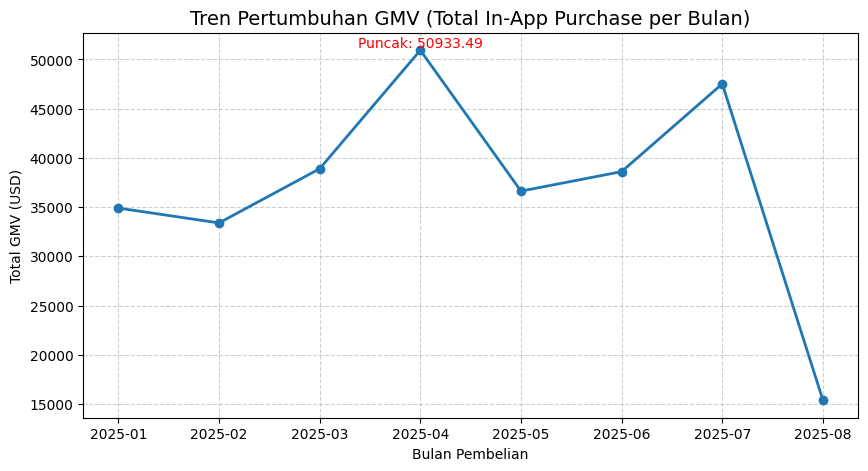

In [89]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_gmv['PurchaseMonth'], monthly_gmv['GMV'],
         color='tab:blue', linewidth=2, marker='o')

plt.title('Tren Pertumbuhan GMV (Total In-App Purchase per Bulan)', fontsize=14)
plt.xlabel('Bulan Pembelian')
plt.ylabel('Total GMV (USD)')
plt.grid(True, linestyle='--', alpha=0.6)

# Tambahkan anotasi titik tertinggi
max_gmv = monthly_gmv['GMV'].max()
max_month = monthly_gmv.loc[monthly_gmv['GMV'].idxmax(), 'PurchaseMonth']
plt.text(max_month, max_gmv, f'Puncak: {max_gmv:.2f}',
         ha='center', va='bottom', fontsize=10, color='red')

plt.show()

# --- 6. MODIFIKASI VISUALISASI ---
Menampilkan variasi tampilan agar lebih menarik dan informatif.

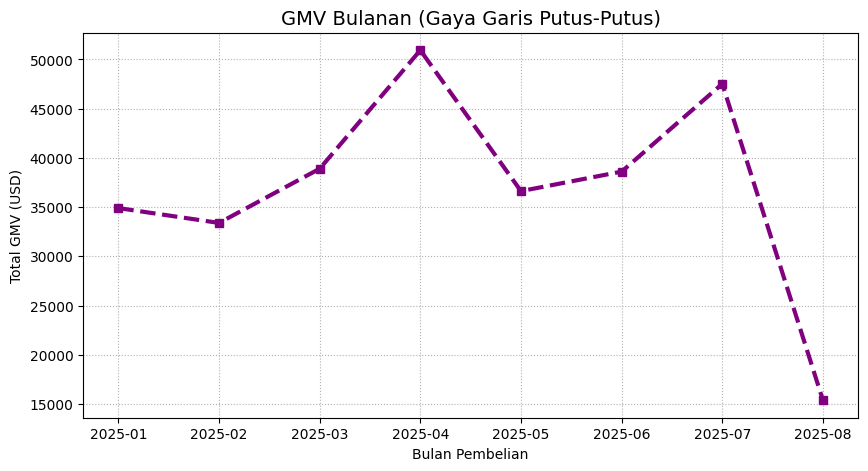

In [90]:
# (A) Line chart dengan variasi gaya
plt.figure(figsize=(10, 5))
plt.plot(monthly_gmv['PurchaseMonth'], monthly_gmv['GMV'],
         color='purple', linewidth=3, linestyle='--', marker='s')
plt.title('GMV Bulanan (Gaya Garis Putus-Putus)', fontsize=14)
plt.xlabel('Bulan Pembelian')
plt.ylabel('Total GMV (USD)')
plt.grid(True, linestyle=':')
plt.show()

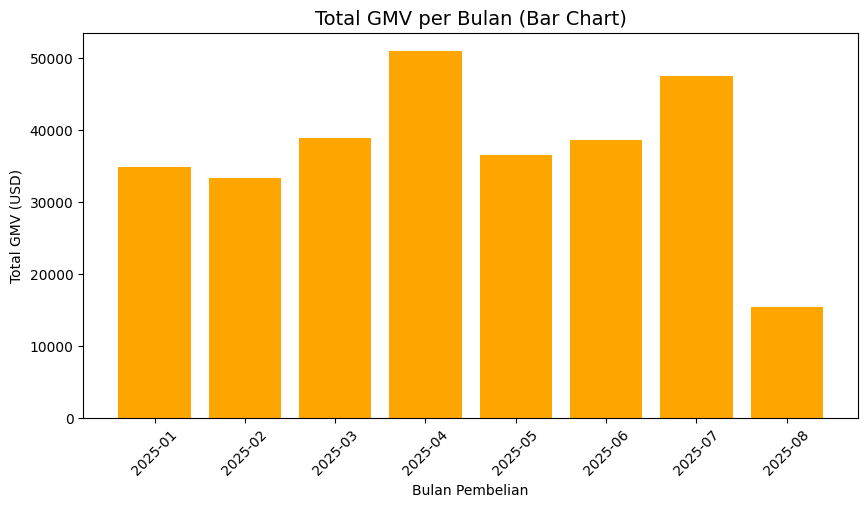

In [91]:
# (B) Bar chart GMV per bulan
plt.figure(figsize=(10, 5))
plt.bar(monthly_gmv['PurchaseMonth'], monthly_gmv['GMV'], color='orange')
plt.title('Total GMV per Bulan (Bar Chart)', fontsize=14)
plt.xlabel('Bulan Pembelian')
plt.ylabel('Total GMV (USD)')
plt.xticks(rotation=45)
plt.show()

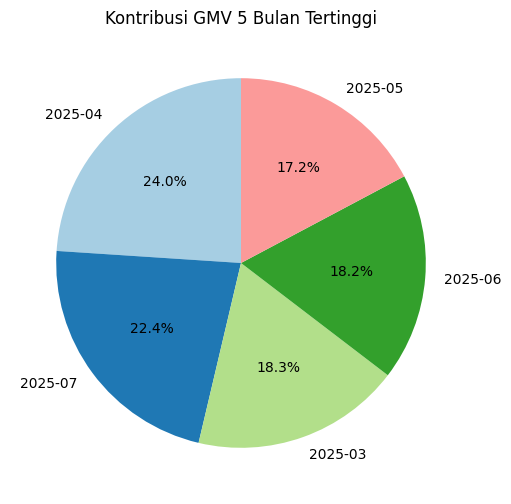

In [92]:
# (C) Pie chart kontribusi 5 bulan teratas
top_months = monthly_gmv.sort_values(by='GMV', ascending=False).head(5)
plt.figure(figsize=(6, 6))
plt.pie(top_months['GMV'], labels=top_months['PurchaseMonth'], autopct='%1.1f%%',
        startangle=90, colors=plt.cm.Paired.colors)
plt.title('Kontribusi GMV 5 Bulan Tertinggi')
plt.show()

# --- 8. ANALISIS TAMBAHAN ---
Mengetahui negara mana yang menghasilkan total pembelian tertinggi.

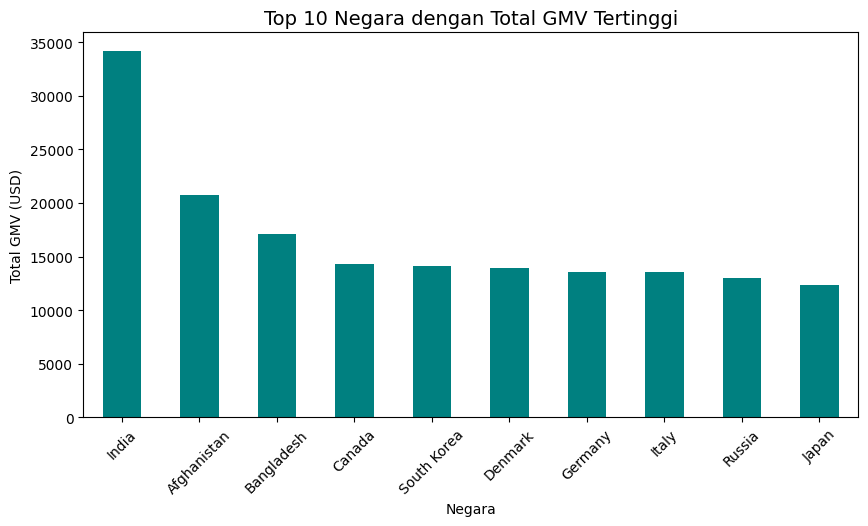

In [93]:
# (D) berdasarkan negara (Top 10)
country_gmv = df.groupby('Country')['GMV'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
country_gmv.plot(kind='bar', color='teal')
plt.title('Top 10 Negara dengan Total GMV Tertinggi', fontsize=14)
plt.ylabel('Total GMV (USD)')
plt.xlabel('Negara')
plt.xticks(rotation=45)
plt.show()

# --- 9. KESIMPULAN DAN ANALISIS ---
#Analisis:
Berdasarkan hasil visualisasi, tren GMV menunjukkan adanya peningkatan pembelian pada periode tertentu, yang dapat dikaitkan dengan event dalam game, promosi, atau perilisan konten baru.
Beberapa negara seperti Amerika Serikat, India, dan China mungkin mendominasi pembelian, sesuai dengan jumlah pemain aktif yang tinggi dan daya beli yang besar. Genre seperti "Battle Royale", "Action RPG", dan "Racing" memiliki kontribusi besar terhadap pendapatan total.

# Kesimpulan:
1. Data visualization ini dibuat untuk memudahkan pemahaman terhadap data pembelian game yang kompleks agar dapat dilihat secara visual dan mudah diinterpretasikan.
2. Beberapa perubahan dan pengolahan data dilakukan, seperti:
   - Menambahkan kolom baru (PurchaseMonth) dari tanggal pembelian.
   - Menghitung nilai GMV dari jumlah pembelian pengguna.
   - Melakukan agregasi data berdasarkan bulan, negara, dan genre.
3. Hasil visualisasi membantu dalam:
   - Mengidentifikasi tren kenaikan atau penurunan pembelian per bulan.
   - Menentukan wilayah dan genre yang paling menguntungkan.
   - Menyusun strategi promosi berdasarkan perilaku pengguna.
4. Secara keseluruhan, visualisasi ini memberikan gambaran yang jelas mengenai perilaku pembelian pemain, serta membantu pengembang game memahami dinamika pasar dan mengambil keputusan yang lebih tepat.
